# Fake Position numeric method

The approximated root of the function is: 0.7390852520225526
The number of iterations was: 3
The value of f(x) for the approximated root is: 1.9883748547666613e-07
The value of epsilon is: 2.220446049250313e-16


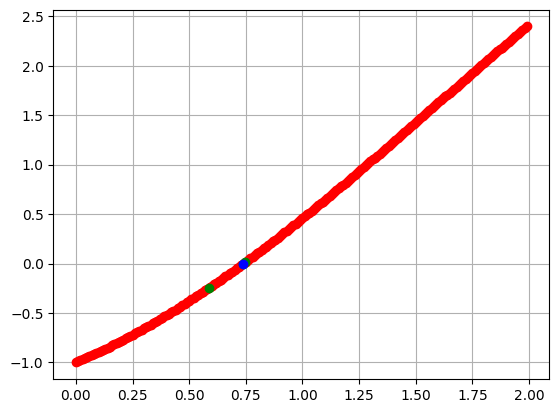

In [1]:
# Import math module for math functions
import math
import matplotlib.pyplot as plt

# Define the funciton you want to find the root of 
def f(x):
    # Change the function here (This one is f(x) = e^x - 2cos(x))
    return x - math.cos(x)

# Fake Position algorithm to find the root of a function, f, between a and b with a given error
def fakePos(f, a, b, error):

    # k is the number of iterations
    k = 0

    # xk is the approximated root of the function
    fa = f(a)
    fb = f(b)
    xk = a - ((fa*(b-a))/(fb - fa))
    fxk = f(xk)
    
    # While the absolute value of f(xk) is greater than the error, keep iterating
    while abs(fxk) > error:

        # Increment the number of iterations
        k += 1
        plt.plot(xk, f(xk), 'go', zorder = 10)
        
        # If f(a) and f(xk) have different signs, then the root is between a and xk
        if fa*fxk < 0:

            
            fa = fa*(fb/(fb+fxk))
            # Set b = xk
            b = xk
            fb = f(b)
        # Otherwise, the root is between xk and b
        else:

            # Set a to xk
            
            fb = fb*(fa/(fa+fxk))
            a = xk
            fa = f(a)
        
        # Recalculate xk, and repeat
        xk = a - ((fa*(b-a))/(fb - fa))
        fxk = f(xk)
    # Return the approximated root, the number of iterations, and the value of f(xk) 
    return xk, k, fxk 

# Test the algorithm

# Set the precision of the algorithm
precision = 6

# Set the interval to search for the root
interval = [0, 2]

# Get the result
result = fakePos(f, *interval, 10**(-precision))

# Print the result
print("The approximated root of the function is:", result[0])
print("The number of iterations was:", result[1])
print("The value of f(x) for the approximated root is:", result[2])

# Conclusion: I couldn't get the algorithm to work for this especific funciton with 16 digits of precision, but it works for 15 digits of precision. 
# While debugging I figured that f(xk) at some point stagneates at 2.220446049250313e-16, which is Python's epsilon.
# Showing the epsilon value:

import sys
epsilon = sys.float_info.epsilon
print("The value of epsilon is:", epsilon)

# matrix with a list of x values and a list of y values

[plt.plot(i/100.0, f(i/100.0), 'ro') for i in range(interval[0]*100, interval[1]*100)]
# plot the root of the function
plt.plot(result[0], result[2], 'bo', zorder = 15)
plt.grid()
plt.show()